## Dateset

- seq_length: only in terms of the input, not including the last token. For example, a palindrome sequence "2415142", its seq_length is 6 (here the input is "241514" and the label is "2").
- total_len: total_len should not be larger than the maximum possible length, $10^{half\_length}$. 

In [ ]:
class PalindromeDataset(data.Dataset):
    def __init__(self, input_length, total_len, one_hot=False):
        """
        Args:
            seq_length: length of the sequence(both input and target)
            total_len: total number of samples in the dataset
            one_hot: whether to use one-hot encoding or not
        """
        pass

In [112]:
# Example: one-hot=False
dataset = PalindromeDataset(6, 800, one_hot=False)
print(dataset[0])

(array([[6.],
       [7.],
       [3.],
       [6.],
       [3.],
       [7.]], dtype=float32), 6)


In [111]:
# Example: one-hot=True
dataset = PalindromeDataset(5, 800, one_hot=True)
print(dataset[0])

(array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), 8)


In [ ]:
# Use pytorch to split a dataset into [train, val, test]
dataset = PalindromeDataset(5, 800, one_hot=True)
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [600, 200], torch.Generator().manual_seed(42))

## Model Structure
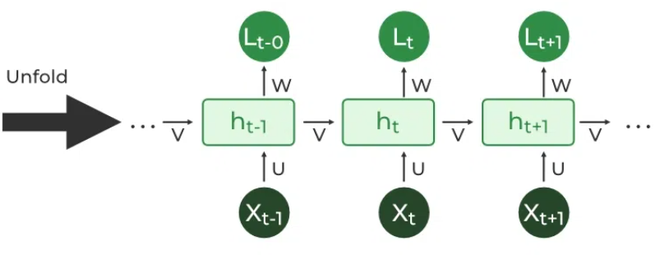

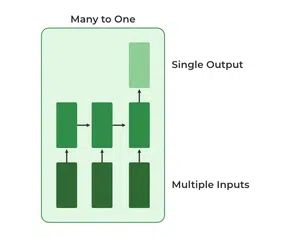
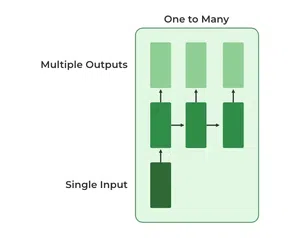
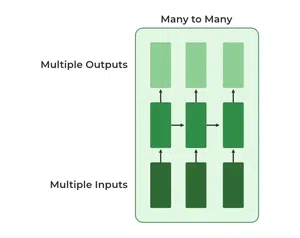

## Forward Procedure
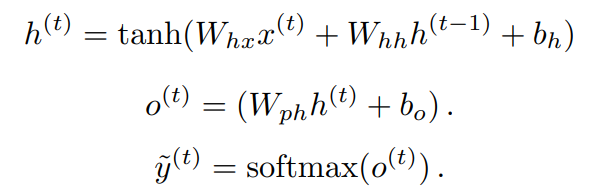

Assume that the batch size is **B**, the input sequence lenght is **T**, the dimension of input x is **Dx** (in our case, the dimension of one-hot vector), and the dimension of hidden features is set as **Dh**. 
- input $x$ - [B T Dx] in one-hot representation; for each input token $x^{(t)}$ is [B Dx]
- $W_{hx}$ - [Dx Dh]
- $h$ - [B Dh]
- $W_{hh}$ - [Dh Dh]
- $b_h$ - [Dh]

$o^{(t)}$ is used for predicting the required output, in our case, only predicting the last token. RNN can also be used for predicting a long sequence which needs predicting token at each hidden state $h$. 
- $W_{ph}$ - [Dh Dx], in our case, the dimension of output embedding is the same as input, so the dimension is Dx here.
- $b_o$ - [Dx]

## Pseudo Code
```text
# initialize the initial state h_0
h_0 = zero_matrix (device, float)

# Recurrence
loop for the time sequence:
    X = get the current input  # [B Dx]
    H = tanh((X * W_xh) + (H * W_hh) + b_h) # [B Dh]
    
# Prediction
Y = H * W_hq + b_q # [B Dx]
Y = softmax(Y)
```

## Pytorch Package
If we use the pytorch package, it is very simple to implement a standard RNN model. 

**Note that Assignment2 don't allow using the nn.RNN module!!!**

In [1]:
import torch
from torch import nn


feature_len = 100
hidden_len = 20
seq_len = 10
num_layers = 2
batch_size = 3

rnn = nn.RNN(feature_len, hidden_len, num_layers)
x = torch.randn(seq_len, batch_size, feature_len)
h0 = torch.zeros(num_layers, batch_size, hidden_len)
out, h = rnn(x, h0)

print(out.shape)
print(h.shape)

torch.Size([10, 3, 20])
torch.Size([2, 3, 20])
